# Integral de convolución en sistemas lineales.

Para un sistema lineal e invariante en el tiempo, la operación de convolución permite el cálculo de la salida, como la respuesta a una señal arbitraria de estímulo $x(t)$, en términos de su respuesta al impulso $h(t)$, por medio de la integral de convolución definida como:

```{math}
:label: convolucion
\begin{equation}
  y(t)=\int^{\infty}_{-\infty}x(\tau)h(t-\tau)d\tau
	\end{equation}
```

La ecuación {eq}`convolucion` se conoce como la integral de convolución para sistemas de tiempo continuo ({cite:t}`Alkin`). Se dice entonces, que la señal de salida $y(t)$ de un sistema se obtiene aplicando la convolución de la señal de entrada o estímulo $x(t)$ con la respuesta al impulso $h(t)$ del sistema. La convolución se representa por medio del operador $*$, el cual se denomina el operador convolución.


```{math}
:label: convolucion_operador
\begin{equation}
  y(t)=x(t)*h(t)=\int^{\infty}_{-\infty}x(\tau)h(t-\tau)d\tau
	\end{equation}
```

```{admonition} Convolución de sistemas de tiempo contínuo:
El operador convolución de la señal de entrada $x(t)$ y la respuesta al impulso de un sistema $h(t)$ proporciona la salida $y(t)$ del sistema como:

```{math}
:label: convolucion_conmuta
\begin{eqnarray}
  y(t)=x(t)*h(t)=\int^{\infty}_{-\infty}x(\tau)h(t-\tau)d\tau\\
  y(t)=h(t)*x(t)=\int^{\infty}_{-\infty}h(\tau)x(t-\tau)d\tau\\
	\end{eqnarray}
```
La operación de convolución es conmutativa. A continuación se muestra de forma gráfica la operación de convoución para determinar la respuesta de los sistemas, usando la respuesta al impulso.

1. Primero, dibuje la señal $x(\tau)$, $\tau$ será considerada como una nueva variable independiente. como se muestra abajo:


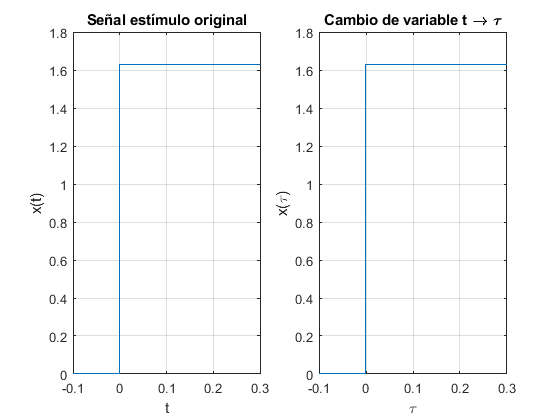

In [1]:
clear
close all
clc

t=[-0.1:0.0001:0.3];
%xt= @(x) sin(11.5*x).*exp(-3*x);
xt= @(x) 1.63*(x>=0);

subplot(1,2,1)
plot(t,xt(t))
xlabel("t")
ylabel("x(t)")
title("Señal estímulo original")
set(gca,'fontsize',10);
grid on

subplot(1,2,2)
plot(t,xt(t))
xlabel("\tau")
ylabel("x(\tau)")
title("Cambio de variable t \rightarrow \tau")
set(gca,'fontsize',10);
grid on

2. Después, para un valor en específico de la variable independiente $t$, dibuje la gráfica de la señal $h(t-\lambda)$. Esta tarea se llevará a cabo en dos pasos principales:

a. Dibuje $h(-\tau)$. Esto significa hacer la operación de reversión en el tiempo. 
b. En $h(\tau)$, sustitúyase $\tau \rightarrow | \tau-t$. Esto significa un desplazaemiento en el tiempo de la función $h(-\tau)$ en $t$ unidades. 

El siguiente código muestra la gráfica de lo anteriormente expuesto:

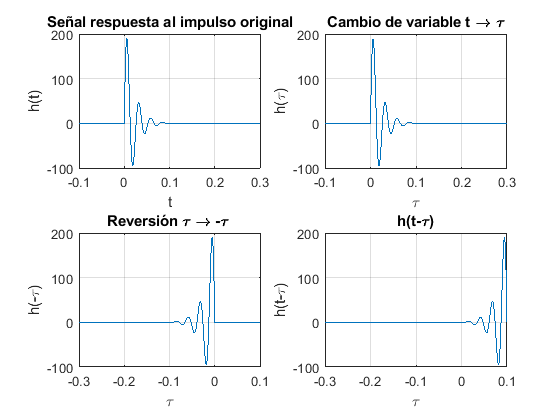

In [2]:
close all
ht=@(x) (x>=0).*(261.7287*sin(239.58*x)).*exp(-52.98*x);

subplot(2,2,1)
plot(t,ht(t))
xlabel("t")
ylabel("h(t)")
title("Señal respuesta al impulso original")
set(gca,'fontsize',10);
grid on

subplot(2,2,2)
plot(t,ht(t))
xlabel("\tau")
ylabel("h(\tau)")
title("Cambio de variable t \rightarrow \tau")
set(gca,'fontsize',10);
grid on

subplot(2,2,3)
plot(-t,ht(t))
xlabel("\tau")
ylabel("h(-\tau)")
title("Reversión \tau \rightarrow -\tau ")
set(gca,'fontsize',10);
grid on

t2=[-0.1:0.0001:0.3];
subplot(2,2,4)
plot(-t,(-t<=0.1).*ht(t+0.1))
xlabel("\tau")
ylabel("h(t-\tau)")
title("h(t-\tau)")
set(gca,'fontsize',10);
grid on

3. Multiplicar las dos señales esbozadas en los pasos 1 y 2 para obtener el producto:

$$
f(\tau)=x(\tau)h(t-\tau)
$$

4. Calcular el area bajo la curva formada por el producto $f(\tau)=x(\tau)h(t-\tau)$, por medio de la integral respecto de la variable independiente $\tau$. El resultado es el valor de la señal en el instante de tiempo específico $t$. 

5. Repita los pasos 1 al 4 para todos los valores de $t$ que son de interés.


Usando la respuesta al impulso $h(t)$ del sistema RLC como se expresa en la ecuación {eq}`h_RLC_final` y la instrucción `cumtrapz()` que permite el cálculo de la respuesta al impulso se puede graficar la respuesta al est $x(t)=1.63u(t)$

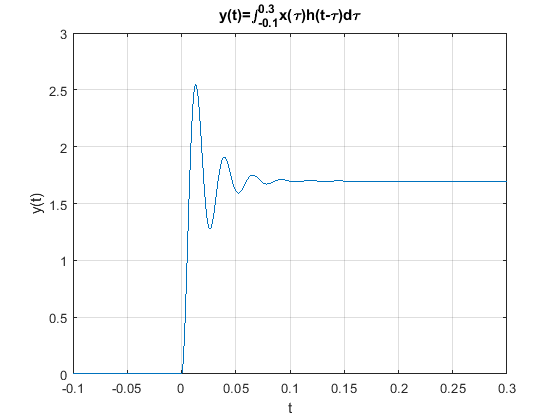

In [3]:
figure
plot(t,0.0001*cumtrapz((t>=0).*ht(t).*xt(t)))
xlabel("t")
ylabel("y(t)")
title("y(t)=\int^{0.3}_{-0.1}x(\tau)h(t-\tau)d\tau")
set(gca,'fontsize',10);
grid on

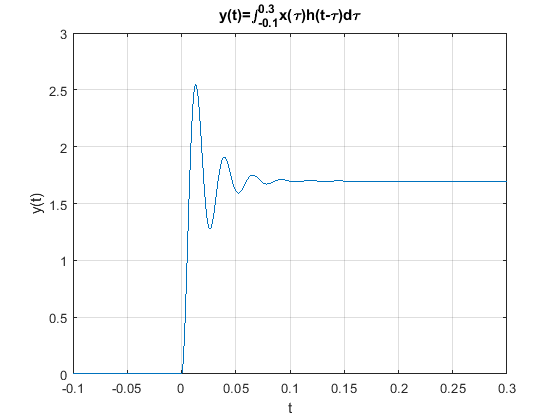

In [4]:
clear
close all
clc

t=[-0.1:0.0001:0.3];
%xt= @(x) sin(11.5*x).*exp(-3*x);
xt= @(x) 1.63*(x>=0);
ht=@(x) (x>=0).*(261.7287*sin(239.58*x)).*exp(-52.98*x);


figure
plot(t,0.0001*cumtrapz((t>=0).*ht(t).*xt(t)))
xlabel("t")
ylabel("y(t)")
title("y(t)=\int^{0.3}_{-0.1}x(\tau)h(t-\tau)d\tau")
set(gca,'fontsize',10);
grid on



## Calculo de la integral de convolución usando la función conv()

En MATLAB, es posible calcular la integral de convolución de forma numérica usando una sola instrucción, tomando en consideración algunos aspectos importantes como la necesidad de escalar la salida unsando el incremento del vector de tiempo y el desplazamiento en el tiempo de la señal que resulta de usar esta función nativa de MATLAB. El siguiente código calcula la salida del sistema RLC modelado por la ecuación diferencial {eq}`edoRLC`.

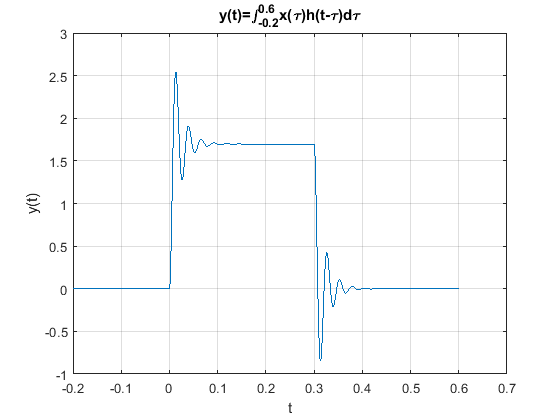

In [5]:
clear
close all
clc

t=[-0.1:0.0001:0.3];
xt= @(x) 1.63*(x>=0);
ht=@(x) (x>=0).*(261.7287*sin(239.58*x)).*exp(-52.98*x);

yt=0.0001*conv(ht(t),xt(t));
t_conv=0.0001*(1:length(yt))+2*min(t);
figure
plot(t_conv,yt);
xlabel("t")
ylabel("y(t)")
title("y(t)=\int^{0.6}_{-0.2}x(\tau)h(t-\tau)d\tau")
set(gca,'fontsize',10);
grid on

Es importante notar como la salida $y(t)$ calculada considera a un vector de tiempo mas largo, sin embargo este no es un problema que impida o invalide el uso de la función `conv()`.

## Ejemplo de aplicación

Para ilustrar un poco más a profundidad el concepto de la integral de convolución usaremos el ejemplo propuesto en el libro ({cite}`Alkin`), generaremos las gráficas usnado MATLAB y haremos el cálculo numérico de la salida del sistema usando el comando `conv()`.

### Ejercicio

Encuentre la salida $y(t)$ del sistema cuya respuesta al impulso es:

$$
h(t)=e^{-t}(u(t)-u(t-2))
$$

Cuando la señal de excitación es:

```{math}
:label: pulso_entrada
\begin{equation}
         x(t)= \left\{ \begin{array}{lcc} 1 & si & 0 \leq t < 1\\ -1 & si & 1 \leq t <2\\ 0 & en~otro~caso &   \end{array} \right.
		 \end{equation}
```
Las gráficas correspondientes a la señal de estímulo $x(t)$ y $h(t)$ se generan en MATLAB con el siguiente código:

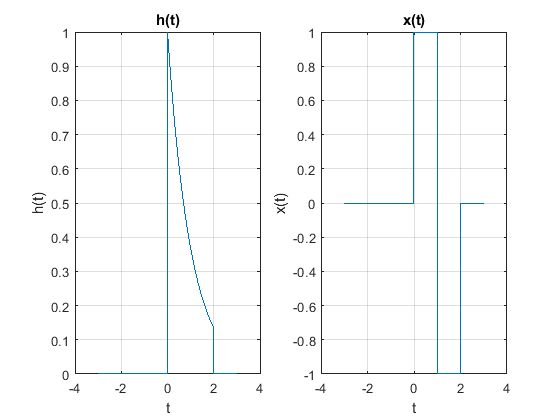

In [6]:
clear
close all
clc
dt=0.0001;

t=[-3:dt:3];
ht= @(x) exp(-x).*((x>=0)-(x>=2));
pt= @(x) ((x>=0)&(x<1))-((x>=1)&(x<2));


figure
subplot(1,2,1)
plot(t,ht(t))
xlabel("t")
ylabel("h(t)")
title("h(t)")
set(gca,'fontsize',10);
grid

subplot(1,2,2)
plot(t,pt(t))
xlabel("t")
ylabel("x(t)")
title("x(t)")
set(gca,'fontsize',10);
grid

El cálculo de la salida $y(t)$ se desglosa en 6 diferentes casos:

**Caso 1**

Cuando $t \leq 0$: en este caso las señales $x(t)$ y $h(t)$ no se sobbreponen, por lo tanto:

$$
y(t)=0
$$




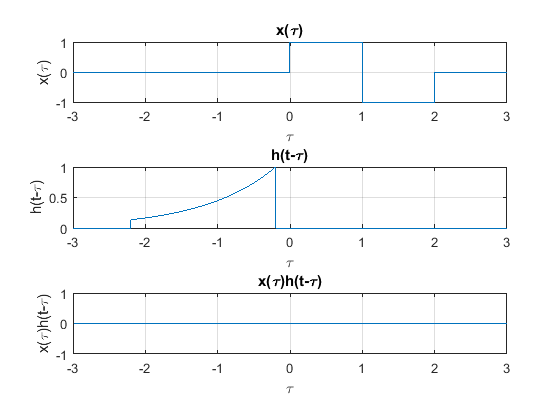

In [7]:
figure

subplot(3,1,1)
plot(t,pt(t))
xlabel("\tau")
ylabel("x(\tau)")
title("x(\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,2)
plot(-t,ht(t-0.2))
xlabel("\tau")
ylabel("h(t-\tau)")
title("h(t-\tau)")
set(gca,'fontsize',10);
grid


subplot(3,1,3)
plot(-t,ht(t-0.2).*pt(-t))
xlabel("\tau")
ylabel("x(\tau)h(t-\tau)")
title("x(\tau)h(t-\tau)")
set(gca,'fontsize',10);
grid




**Caso 2**

Cuando $0 < t \leq 1$ : 

$$
y(t)=\int^t_0(1)e^{-(t-\tau)}d\tau
$$

$$
y(t)=1-e^{-t}~~si~~0 < t \leq 1
$$

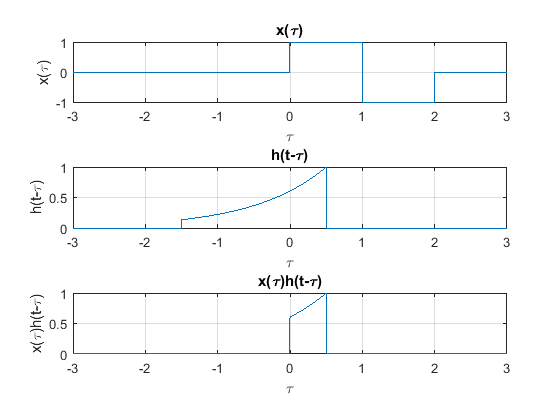

In [8]:
figure

subplot(3,1,1)
plot(t,pt(t))
xlabel("\tau")
ylabel("x(\tau)")
title("x(\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,2)
plot(-t,ht(t+0.5))
xlabel("\tau")
ylabel("h(t-\tau)")
title("h(t-\tau)")
set(gca,'fontsize',10);
grid


subplot(3,1,3)
plot(-t,ht(t+0.5).*pt(-t))
xlabel("\tau")
ylabel("x(\tau)h(t-\tau)")
title("x(\tau)h(t-\tau)")
set(gca,'fontsize',10);
grid

**Caso 3**

Cuando $1 < t \leq 2$ :

$$
y(t)=\int^1_0(1)e^{-(t-\tau)}d\tau+\int^t_1(-1)e^{-(t-\tau)}d\tau
$$

$$
y(t)=-1+4.4366e^{-t}~~si~~1 < t \leq 2
$$


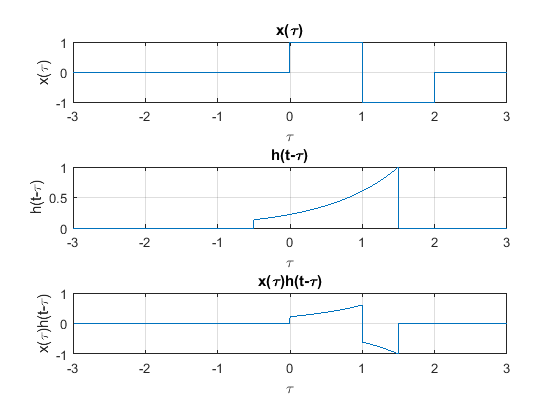

In [9]:

subplot(3,1,1)
plot(t,pt(t))
xlabel("\tau")
ylabel("x(\tau)")
title("x(\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,2)
plot(-t,ht(t+1.5))
xlabel("\tau")
ylabel("h(t-\tau)")
title("h(t-\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,3)
plot(-t,ht(t+1.5).*pt(-t))
xlabel("\tau")
ylabel("x(\tau)h(t-\tau)")
title("x(\tau)h(t-\tau)")
set(gca,'fontsize',10);
grid


**Caso 4**

Cuando $2 < t \leq 3$ : 

$$
y(t)=\int^1_{t-2}(1)e^{-(t-\tau)}d\tau+\int^2_1(-1)e^{-(t-\tau)}d\tau
$$

$$
y(t)=-0.1353-1.9525e^{-t}~~si~~2 < t \leq 3
$$


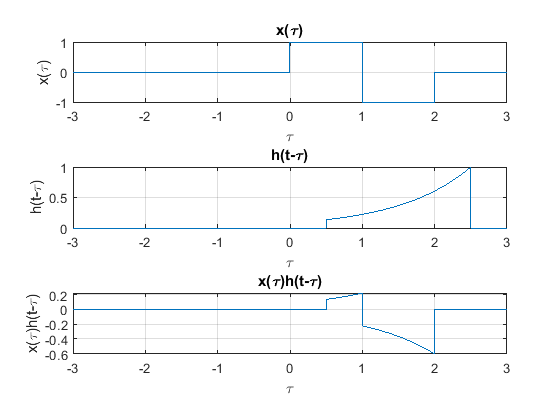

In [10]:

figure

subplot(3,1,1)
plot(t,pt(t))
xlabel("\tau")
ylabel("x(\tau)")
title("x(\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,2)
plot(-t,ht(t+2.5))
xlabel("\tau")
ylabel("h(t-\tau)")
title("h(t-\tau)")
set(gca,'fontsize',10);
grid


subplot(3,1,3)
plot(-t,ht(t+2.5).*pt(-t))
xlabel("\tau")
ylabel("x(\tau)h(t-\tau)")
title("x(\tau)h(t-\tau)")
set(gca,'fontsize',10);
grid




**Caso 5**

Cuando $3 < t \leq 4$ : 

$$
y(t)=\int^2_{t-2}(-1)e^{-(t-\tau)}d\tau
$$

$$
y(t)=0.1353-7.3891e^{-t}~~si~~3 < t \leq 4
$$

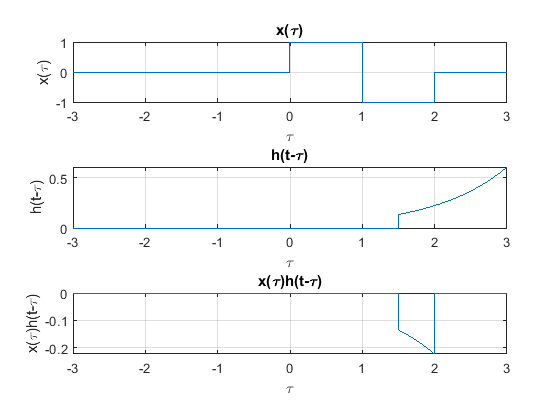

In [11]:
figure

subplot(3,1,1)
plot(t,pt(t))
xlabel("\tau")
ylabel("x(\tau)")
title("x(\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,2)
plot(-t,ht(t+3.5))
xlabel("\tau")
ylabel("h(t-\tau)")
title("h(t-\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,3)
plot(-t,ht(t+3.5).*pt(-t))
xlabel("\tau")
ylabel("x(\tau)h(t-\tau)")
title("x(\tau)h(t-\tau)")
set(gca,'fontsize',10);
grid



**Caso 6**

Cuando $t>4$: en este caso las señales $x(t)$ y $h(t)$ no se sobbreponen, por lo tanto:

$$
y(t)=0
$$

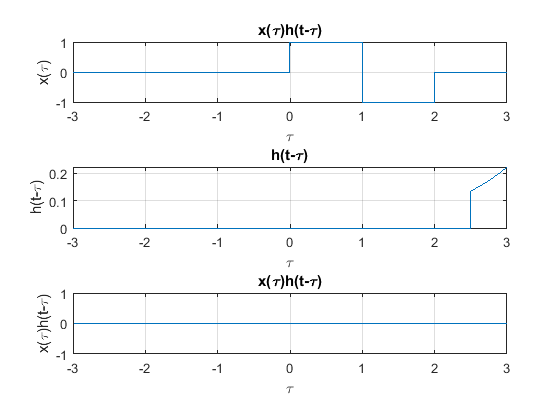

In [12]:
figure

subplot(3,1,1)
plot(t,pt(t))
xlabel("\tau")
ylabel("x(\tau)")
title("x(\tau)h(t-\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,2)
plot(-t,ht(t+4.5))
xlabel("\tau")
ylabel("h(t-\tau)")
title("h(t-\tau)")
set(gca,'fontsize',10);
grid

subplot(3,1,3)
plot(-t,ht(t+4.5).*pt(-t))
xlabel("\tau")
ylabel("x(\tau)h(t-\tau)")
title("x(\tau)h(t-\tau)")
set(gca,'fontsize',10);
grid


La señal de salida del sistema $y(t)$ se obtiene combinando las expresiones anteriores:

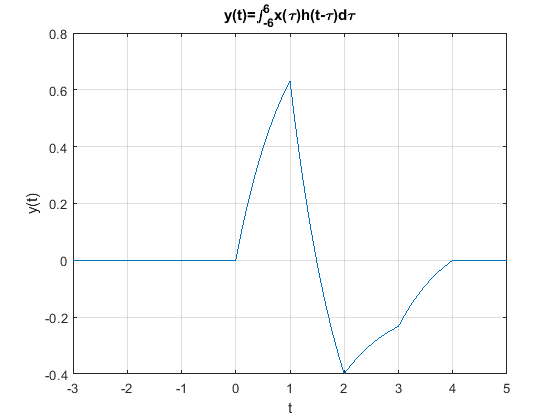

In [13]:
figure
t=[-3:dt:5];
yt=(1-exp(-t)).*((t>0)&(t<=1))+...
    +(-1+4.4366*exp(-t)).*((t>1)&(t<=2))+(-0.1353-1.9525*exp(-t)).*((t>2)&(t<=3))+...
    +(0.1353-7.3891*exp(-t)).*((t>3)&(t<=4));

plot(t,yt)
xlabel("t")
ylabel("y(t)")
title("y(t)=\int^{6}_{-6}x(\tau)h(t-\tau)d\tau")
set(gca,'fontsize',10);
grid

Alternativamente, la salida completa se puede obtener usando el comando `conv()`, como se muestra a continuación:

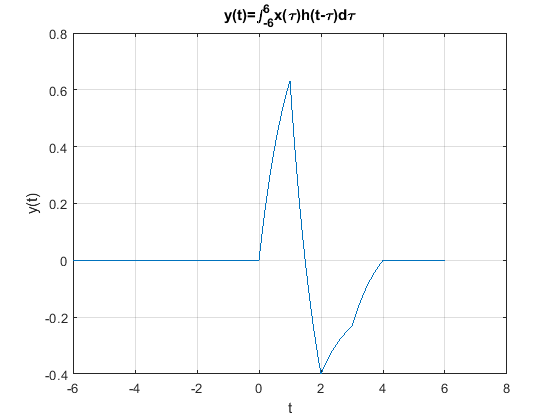

In [14]:
t=[-3:dt:3];
y=dt*conv(ht(t),pt(t));
ty=dt*(1:length(y))+2*min(t);
figure
plot(ty,y)
xlabel("t")
ylabel("y(t)")
title("y(t)=\int^{6}_{-6}x(\tau)h(t-\tau)d\tau")
set(gca,'fontsize',10);
grid